# **SUPPLY CHAIN ANALYSIS AND WAREHOUSE OPTIMIZATION**

# **EXPLORATORY DATA ANALYSIS**

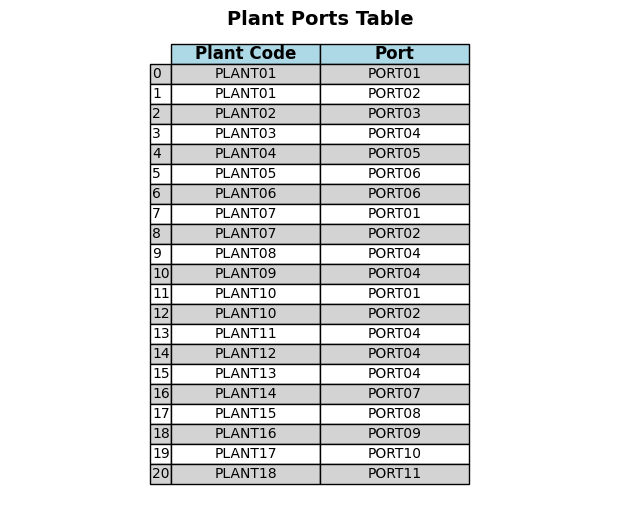

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table

# Load the Excel file
xls = "/content/Supply chain logisitcs problem.xlsx"

# Load individual sheets
plant_ports = pd.read_excel(xls, "PlantPorts")

# Plot the table in a visually appealing format
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size
ax.set_frame_on(False)  # Remove axis frame
ax.xaxis.set_visible(False)  # Hide x-axis
ax.yaxis.set_visible(False)  # Hide y-axis

# Create a table on the plot
table_data = table(ax, plant_ports, loc='center', cellLoc='center', colWidths=[0.2] * len(plant_ports.columns))

# Style the table
table_data.auto_set_font_size(False)
table_data.set_fontsize(10)
table_data.scale(1.2, 1.2)  # Adjust table size

# Set table cell colors
for key, cell in table_data.get_celld().items():
    cell.set_edgecolor('black')  # Set border color
    if key[0] == 0:  # Header row styling
        cell.set_facecolor('lightblue')
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')
    else:  # Alternate row colors
        cell.set_facecolor('white' if key[0] % 2 == 0 else 'lightgrey')

plt.title("Plant Ports Table", fontsize=14, fontweight="bold")
plt.show()



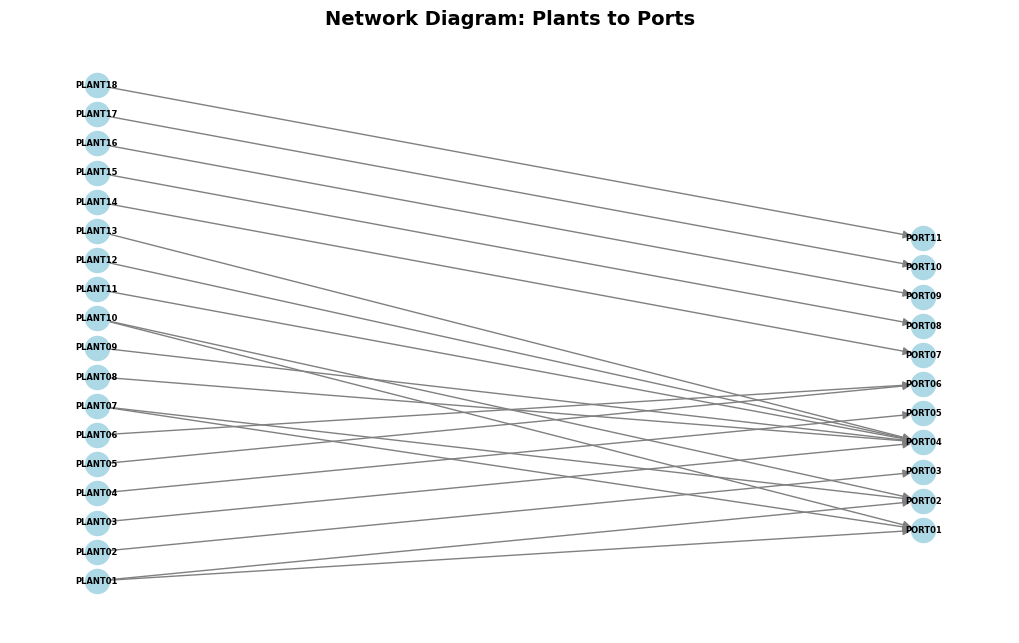

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for plants and ports
plants = plant_ports["Plant Code"].unique()
ports = plant_ports["Port"].unique()

# Define spacing for left-side (plants) and center-align right-side (ports)
plant_positions = {plant: (0, list(plants).index(plant) * 2) for plant in plants}
port_positions = {port: (1, (len(plants) - len(ports)) / 2 + list(ports).index(port) * 2) for port in ports}

# Add nodes with updated positions
for plant, pos in plant_positions.items():
    G.add_node(plant, pos=pos)

for port, pos in port_positions.items():
    G.add_node(port, pos=pos)

# Add edges based on allowed connections
for _, row in plant_ports.iterrows():
    G.add_edge(row["Plant Code"], row["Port"])

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Plot the network graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=300, node_color="lightblue", edge_color="gray",
        font_size=6, font_weight="bold", arrowsize=12)

plt.title("Network Diagram: Plants to Ports", fontsize=14, fontweight="bold")
plt.show()


--- Available Couriers & Lanes ---


,Carrier,orig_port_cd,dest_port_cd,minm_wgh_qty,max_wgh_qty,rate
0,V444_0,PORT02,PORT09,5,5,5
1,V444_0,PORT04,PORT09,20,20,20
2,V444_1,PORT02,PORT09,20,20,20
3,V444_1,PORT04,PORT09,40,40,40
4,V444_1,PORT05,PORT09,42,42,42
5,V444_1,PORT06,PORT09,29,29,29
6,V444_1,PORT10,PORT09,32,32,32
7,V444_2,PORT02,PORT09,5,5,5
8,V444_2,PORT07,PORT09,20,20,20
9,V444_2,PORT08,PORT09,15,15,15



--- Best Courier Per Lane ---


,Carrier,Origin Port,Destination Port,minm_wgh_qty,max_wgh_qty,rate
0,V444_8,PORT01,PORT09,100.0,249.99,0.1600
90,V444_8,PORT02,PORT09,100.0,249.99,0.0484
110,V444_8,PORT03,PORT09,2000.0,99999.99,0.1156
207,V444_0,PORT04,PORT09,2000.0,99999.99,0.0424
284,V444_5,PORT05,PORT09,2000.0,99999.99,0.0720
370,V444_5,PORT06,PORT09,0.0,99.99,0.0740
394,V444_2,PORT07,PORT09,2000.0,99999.99,0.1448
425,V444_2,PORT08,PORT09,2000.0,99999.99,0.1016
441,V444_8,PORT09,PORT09,500.0,1999.99,0.0332
510,V444_1,PORT10,PORT09,100.0,455.99,0.0964



--- Best Weight Bracket Per Lane ---


,Carrier,Origin Port,Destination Port,minm_wgh_qty,max_wgh_qty,rate
0,V444_8,PORT01,PORT09,100.0,249.99,0.1600
90,V444_8,PORT02,PORT09,100.0,249.99,0.0484
110,V444_8,PORT03,PORT09,2000.0,99999.99,0.1156
207,V444_0,PORT04,PORT09,2000.0,99999.99,0.0424
284,V444_5,PORT05,PORT09,2000.0,99999.99,0.0720
370,V444_5,PORT06,PORT09,0.0,99.99,0.0740
394,V444_2,PORT07,PORT09,2000.0,99999.99,0.1448
425,V444_2,PORT08,PORT09,2000.0,99999.99,0.1016
441,V444_8,PORT09,PORT09,500.0,1999.99,0.0332
510,V444_1,PORT10,PORT09,100.0,455.99,0.0964


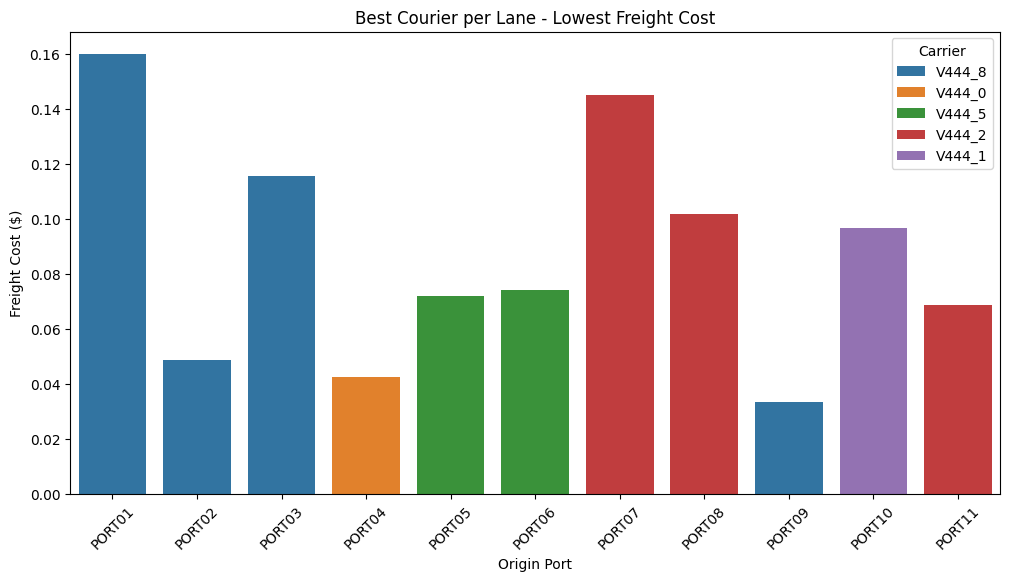

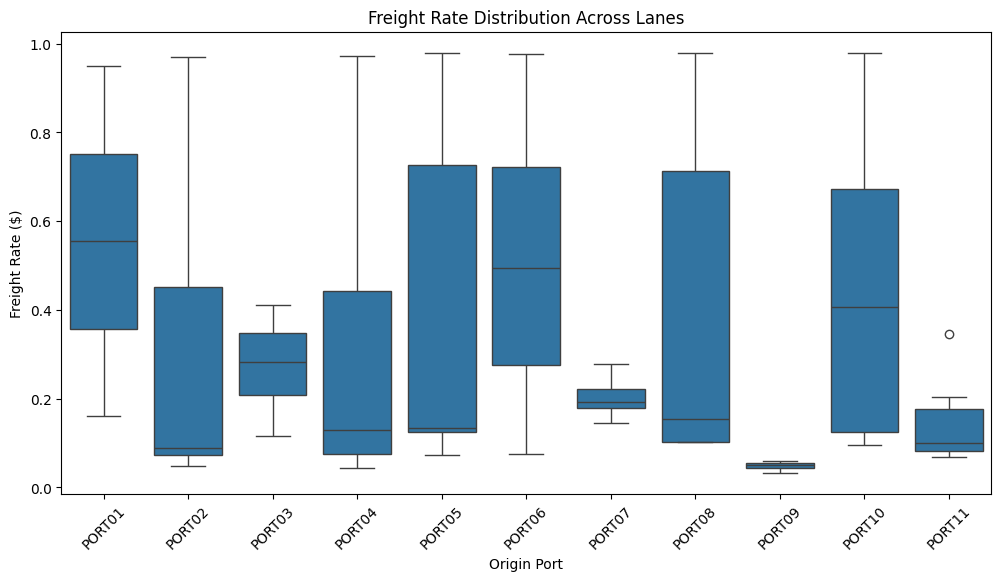

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
xls = "/content/Supply chain logisitcs problem.xlsx"

# Load individual sheets
freight_rates = pd.read_excel(xls, "FreightRates")


# 1. Checking available couriers and weight brackets
courier_summary = freight_rates.groupby(["Carrier", "orig_port_cd", "dest_port_cd"])[["minm_wgh_qty", "max_wgh_qty", "rate"]].count().reset_index()
print("\n--- Available Couriers & Lanes ---")
display(courier_summary)

# 2. Finding the most cost-effective courier for each lane
best_courier_per_lane = freight_rates.loc[freight_rates.groupby(["orig_port_cd", "dest_port_cd"])["rate"].idxmin()]
best_courier_per_lane = best_courier_per_lane[["Carrier", "orig_port_cd", "dest_port_cd", "minm_wgh_qty", "max_wgh_qty", "rate"]]
best_courier_per_lane.rename(columns={"orig_port_cd": "Origin Port", "dest_port_cd": "Destination Port"}, inplace=True)
print("\n--- Best Courier Per Lane ---")
display(best_courier_per_lane)

# 3. Finding the best weight bracket per lane for cost minimization
best_weight_bracket = freight_rates.loc[freight_rates.groupby(["orig_port_cd", "dest_port_cd"])["rate"].idxmin()]
best_weight_bracket = best_weight_bracket[["Carrier", "orig_port_cd", "dest_port_cd", "minm_wgh_qty", "max_wgh_qty", "rate"]]
best_weight_bracket.rename(columns={"orig_port_cd": "Origin Port", "dest_port_cd": "Destination Port"}, inplace=True)
print("\n--- Best Weight Bracket Per Lane ---")
display(best_weight_bracket)

# 4. Visualizing the lowest rates per lane
plt.figure(figsize=(12, 6))
sns.barplot(x="Origin Port", y="rate", hue="Carrier", data=best_courier_per_lane)
plt.xticks(rotation=45)
plt.title("Best Courier per Lane - Lowest Freight Cost")
plt.xlabel("Origin Port")
plt.ylabel("Freight Cost ($)")
plt.legend(title="Carrier")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="orig_port_cd", y="rate", data=freight_rates)
plt.xticks(rotation=45)
plt.title("Freight Rate Distribution Across Lanes")
plt.xlabel("Origin Port")
plt.ylabel("Freight Rate ($)")
plt.show()


In [ ]:
# Install Required Libraries
!pip install deap numpy networkx

import numpy as np
import random
import pandas as pd
import networkx as nx
from deap import base, creator, tools, algorithms
from IPython.display import display  # Import display from IPython.display


# Load the Excel file
xls = pd.read_excel('/content/Supply chain logisitcs problem.xlsx', sheet_name=None)

# Load relevant tables
freight_rates = xls["FreightRates"] # Transportation costs and times
plant_ports = xls["PlantPorts"]  # Allowed warehouse-port links
# Load warehouse costs data from "WhCosts" sheet
df_wh_costs = xls["WhCosts"]
# Load the ProductsPerPlant sheet into a DataFrame
products_per_plant = xls["ProductsPerPlant"]  # Added this line to load the data


# Aggregate initial orders per warehouse (plant) based on the count of product IDs allocated to each plant
# Use products_per_plant instead of df_products_per_plant
df_initial_orders = products_per_plant.groupby("Plant Code")["Product ID"].count().reset_index()
df_initial_orders.rename(columns={"Plant Code": "Warehouse", "Product ID": "Initial Orders"}, inplace=True)


# Merge with cost per unit data from WhCosts sheet (now using df_wh_costs)
df_merged = pd.merge(df_initial_orders, df_wh_costs, left_on="Warehouse", right_on="WH", how="left")
df_merged.drop(columns=["WH"], inplace=True)

# Calculate initial cost
df_merged["Initial Cost"] = df_merged["Initial Orders"] * df_merged["Cost/unit"]

# Sort by cost per unit in ascending order
df_merged_sorted = df_merged.sort_values(by="Cost/unit", ascending=True).reset_index(drop=True)


# Assign wh_capacities to the DataFrame from the xls dictionary
wh_capacities = xls["WhCapacities"]

# Rename columns for consistency
wh_capacities.rename(columns={"Plant ID": "Warehouse", "Daily Capacity ": "Max Capacity"}, inplace=True)


# Rename columns for consistency
# Assuming that `wh_capacities` is a pandas DataFrame
wh_capacities.rename(columns={"Plant ID": "Warehouse", "Daily Capacity ": "Max Capacity"}, inplace=True)

# Merge the initial warehouse cost data with warehouse capacities
df_combined = pd.merge(df_merged_sorted, wh_capacities, on="Warehouse", how="left")


# Calculate the total row
total_row = {
    "Warehouse": "TOTAL",
    "Max Capacity": df_combined["Max Capacity"].sum(),
    "Initial Orders": df_combined["Initial Orders"].sum(),
    "Cost/unit": None,
    "Initial Cost": df_combined["Initial Cost"].sum(),
}

# Append the total row to the dataframe
df_combined_sorted = pd.concat([df_combined, pd.DataFrame([total_row])], ignore_index=True)

# Rearrange the column order
df_combined_sorted = df_combined_sorted[["Warehouse", "Max Capacity", "Initial Orders", "Cost/unit", "Initial Cost"]]

# Display the updated final report
display(df_combined_sorted)

<ipython-input-3-6da6ed22855f>:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined_sorted = pd.concat([df_combined, pd.DataFrame([total_row])], ignore_index=True)


,Warehouse,Max Capacity,Initial Orders,Cost/unit,Initial Cost
0,PLANT07,265,29,0.371424,10.771294
1,PLANT04,554,134,0.428503,57.419442
2,PLANT17,8,20,0.428947,8.578932
3,PLANT09,11,8,0.465071,3.720569
4,PLANT13,490,150,0.469707,70.456058
5,PLANT02,138,116,0.477504,55.390408
6,PLANT05,385,127,0.488144,61.994337
7,PLANT10,118,121,0.493582,59.723410
8,PLANT03,1013,781,0.517502,404.168977
9,PLANT08,14,21,0.522857,10.980003


In [ ]:
wh_costs = xls["WhCosts"]
# Sort the whCosts sheet in ascending order of Cost/unit
sorted_wh_costs = wh_costs.sort_values(by="Cost/unit", ascending=True)

# Print the sorted warehouse costs
print("\n📌 **Warehouse Costs Sorted by Cost per Unit (Ascending Order):**")
print(sorted_wh_costs)


📌 **Warehouse Costs Sorted by Cost per Unit (Ascending Order):**
         WH  Cost/unit
8   PLANT07   0.371424
17  PLANT04   0.428503
1   PLANT17   0.428947
13  PLANT09   0.465071
15  PLANT13   0.469707
4   PLANT02   0.477504
3   PLANT05   0.488144
7   PLANT10   0.493582
14  PLANT03   0.517502
16  PLANT08   0.522857
6   PLANT06   0.554088
12  PLANT11   0.555247
5   PLANT01   0.566976
9   PLANT14   0.634330
11  PLANT12   0.773132
0   PLANT15   1.415063
10  PLANT16   1.919808
2   PLANT18   2.036254


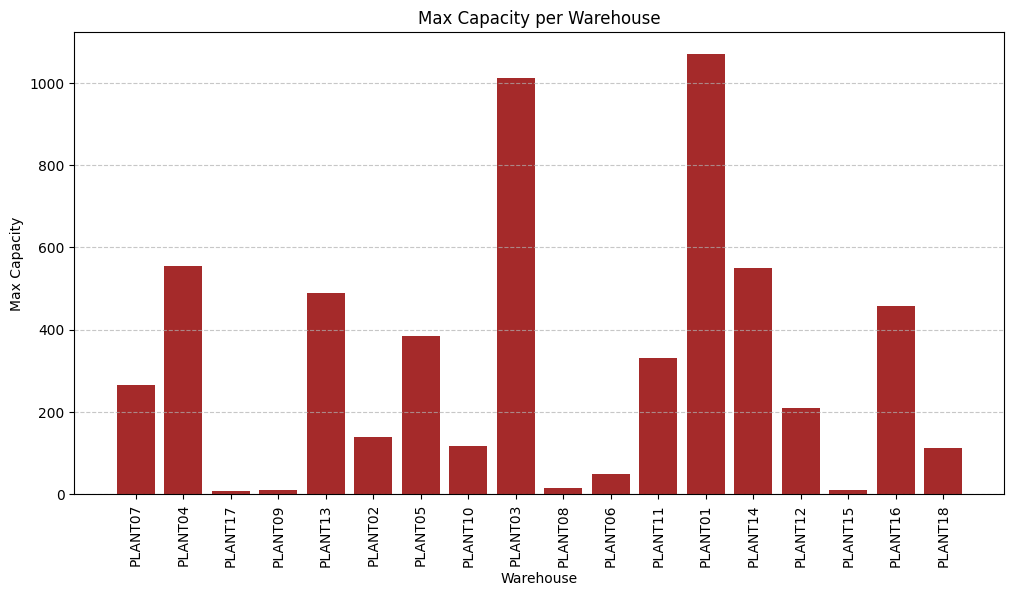

In [ ]:
import matplotlib.pyplot as plt

# Filter out the TOTAL row from df_combined_sorted
# and assign it to df_filtered
df_filtered = df_combined_sorted[df_combined_sorted["Warehouse"] != "TOTAL"]

# Plot the bar chart for Warehouse vs Initial Orders
plt.figure(figsize=(12, 6))
plt.bar(df_filtered["Warehouse"], df_filtered["Max Capacity"], color='brown')
plt.xlabel("Warehouse")
plt.ylabel("Max Capacity")
plt.title("Max Capacity per Warehouse")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

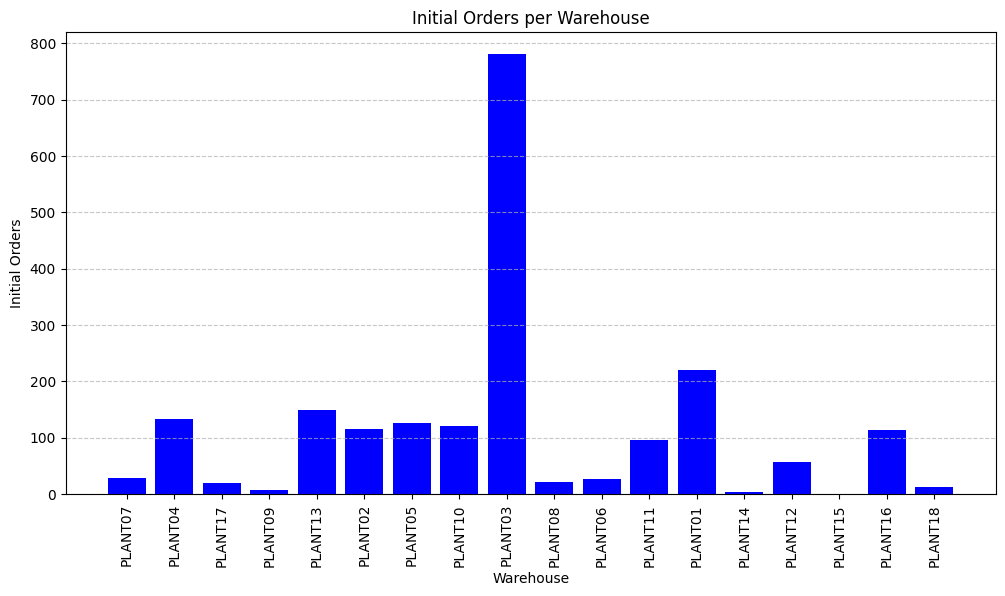

In [ ]:
import matplotlib.pyplot as plt

# Filter out the TOTAL row from df_combined_sorted
# and assign it to df_filtered
df_filtered = df_combined_sorted[df_combined_sorted["Warehouse"] != "TOTAL"]

# Plot the bar chart for Warehouse vs Initial Orders
plt.figure(figsize=(12, 6))
plt.bar(df_filtered["Warehouse"], df_filtered["Initial Orders"], color='blue')
plt.xlabel("Warehouse")
plt.ylabel("Initial Orders")
plt.title("Initial Orders per Warehouse")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

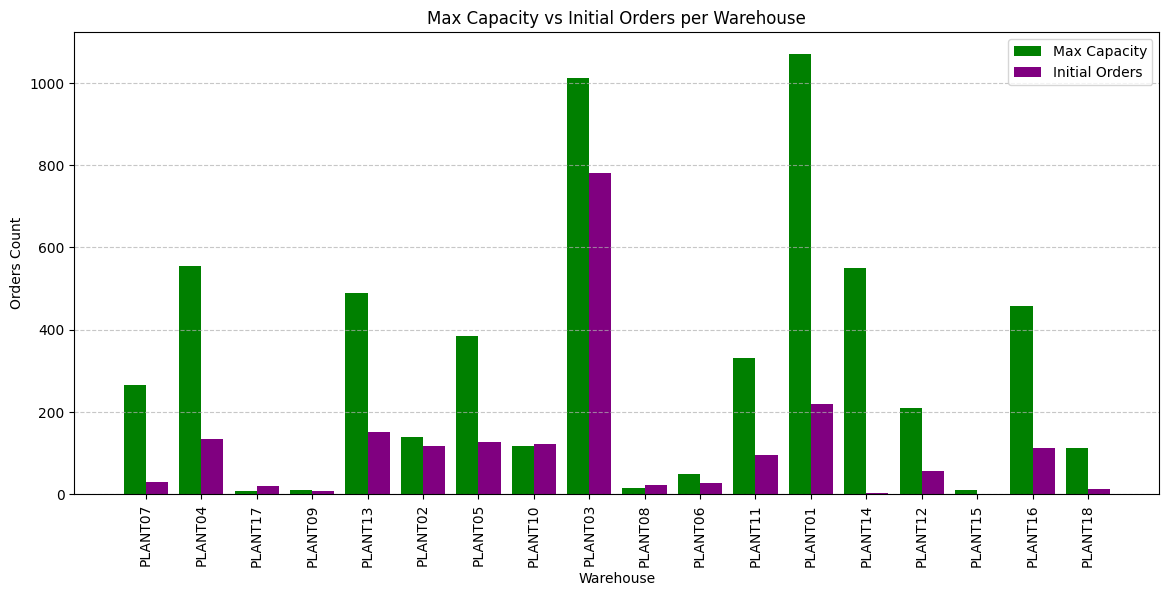

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_combined_sorted[df_combined_sorted["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Max Capacity"], width=bar_width, color='green', label="Max Capacity")
plt.bar(x_indexes + bar_width/2, df_filtered["Initial Orders"], width=bar_width, color='purple', label="Initial Orders")

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Orders Count")
plt.title("Max Capacity vs Initial Orders per Warehouse")
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


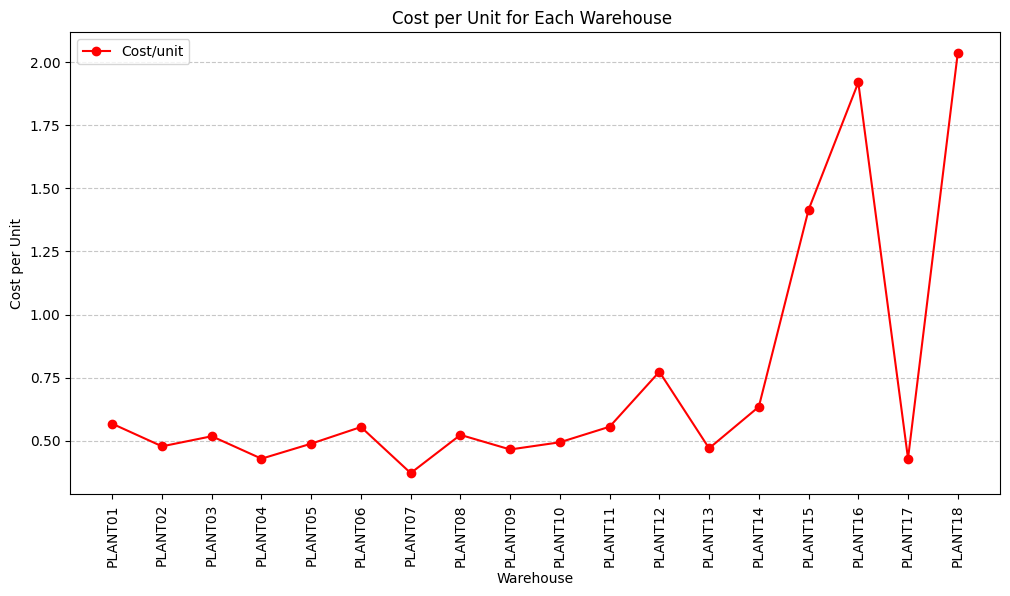

In [ ]:
# Filter out the TOTAL row and sort by Warehouse in numerical order
df_filtered_sorted = df_filtered.sort_values(by="Warehouse", key=lambda x: x.str.extract('(\d+)')[0].astype(float))

# Plot the line graph for Warehouse vs Cost/unit
plt.figure(figsize=(12, 6))
plt.plot(df_filtered_sorted["Warehouse"], df_filtered_sorted["Cost/unit"], marker='o', linestyle='-', color='red', label="Cost/unit")

plt.xlabel("Warehouse")
plt.ylabel("Cost per Unit")
plt.title("Cost per Unit for Each Warehouse ")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

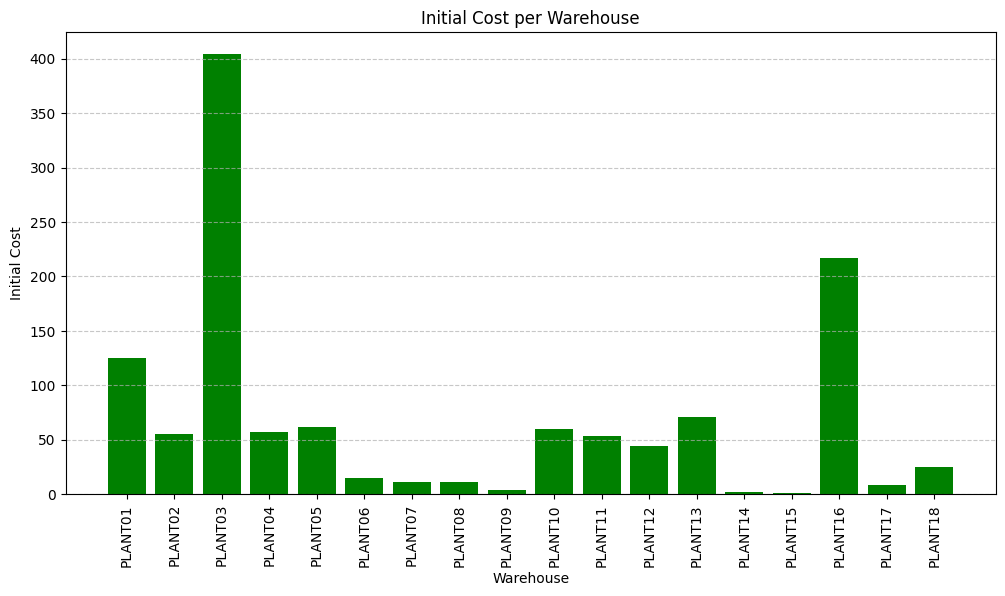

In [ ]:
# Plot the bar chart for Warehouse vs Initial Cost
plt.figure(figsize=(12, 6))
plt.bar(df_filtered_sorted["Warehouse"], df_filtered_sorted["Initial Cost"], color='green')

plt.xlabel("Warehouse")
plt.ylabel("Initial Cost")
plt.title("Initial Cost per Warehouse")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
# Extract total initial cost from the "TOTAL" row of df_combined_sorted
total_initial_cost = df_combined_sorted[df_combined_sorted["Warehouse"] == "TOTAL"]["Initial Cost"].values[0]

# Round the total cost for better readability
total_initial_cost_rounded = round(total_initial_cost, 2)

# Print the result
print(f"\n💰 Total Cost for Warehouse Utilization: {total_initial_cost_rounded}")



💰 Total Cost for Warehouse Utilization: 1224.41


# **OPTIMIZATION USING ALGORITHMS**

# **Genetic Algorithm**

In [ ]:
# Install DEAP (if not already installed)
!pip install deap

import numpy as np
import random
import pandas as pd
from deap import base, creator, tools, algorithms

# Load the Excel file
xls = pd.read_excel('/content/Supply chain logisitcs problem.xlsx', sheet_name=None)

# Load relevant tables
wh_capacities = xls["WhCapacities"]  # Warehouse capacities
wh_costs = xls["WhCosts"]  # Warehouse costs per unit
products_per_plant = xls["ProductsPerPlant"]  # Product-Warehouse compatibility
order_list = xls["OrderList"]  # Historical orders

# **Filter Valid Warehouses**
valid_warehouses = set(wh_capacities["Plant ID"])  # Only warehouses from the capacity table

wh_capacities_dict = dict(zip(wh_capacities["Plant ID"], wh_capacities["Daily Capacity "]))
wh_costs_dict = dict(zip(wh_costs["WH"], wh_costs["Cost/unit"]))

# Sort warehouses by cost (ascending order) to prioritize cheaper warehouses
sorted_warehouses = sorted(wh_costs_dict.keys(), key=lambda x: wh_costs_dict[x])

# Process Product-Warehouse Compatibility
product_warehouse_map = {}
product_allocations_needed = {}

for _, row in products_per_plant.iterrows():
    product_id = row["Product ID"]
    plant_code = row["Plant Code"]

    if plant_code not in valid_warehouses:
        continue  # Skip invalid warehouses

    if product_id not in product_warehouse_map:
        product_warehouse_map[product_id] = []
    product_warehouse_map[product_id].append(plant_code)

    # Track how many times this product needs to be allocated
    product_allocations_needed[product_id] = product_allocations_needed.get(product_id, 0) + 1

# Total allocations required (should be 2036)
total_allocations_needed = sum(product_allocations_needed.values())

# Process Demand per Product
product_demand = order_list.groupby("Product ID")["Unit quantity"].sum().to_dict()

# **Avoid Duplicate Creator Definitions**
if "FitnessMin" not in creator.__dict__:
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if "Individual" not in creator.__dict__:
    creator.create("Individual", list, fitness=creator.FitnessMin)

# Genetic Algorithm Setup
POP_SIZE = 100  # Increased population size
NGEN = 200  # More generations for stability
CXPB, MUTPB = 0.7, 0.2  # Crossover and mutation probability

# Define Individual Generation with Cost Optimization
def generate_individual():
    """Generate a valid warehouse allocation while ensuring cost-efficient allocation."""
    individual = []
    warehouse_usage = {wh: 0 for wh in wh_capacities_dict.keys()}  # Track warehouse usage

    for product, required_allocations in product_allocations_needed.items():
        valid_warehouses = product_warehouse_map.get(product, [])
        valid_warehouses = [wh for wh in valid_warehouses if wh in wh_capacities_dict]  # **Ensure only valid warehouses**

        if not valid_warehouses:
            continue  # Skip products without valid warehouses

        # Sort warehouses for each product by lowest cost
        sorted_valid_warehouses = sorted(valid_warehouses, key=lambda x: wh_costs_dict[x])

        # Allocate product multiple times within warehouse constraints
        for _ in range(required_allocations):
            available_warehouses = [wh for wh in sorted_valid_warehouses if warehouse_usage[wh] < wh_capacities_dict[wh]]
            chosen_warehouse = available_warehouses[0] if available_warehouses else sorted_valid_warehouses[0]
            individual.append((product, chosen_warehouse))
            warehouse_usage[chosen_warehouse] += 1

    return individual

# **Updated GA Fitness Function to Prioritize Cost-Efficient Warehouses**
def evaluate(individual):
    """Evaluate cost efficiency while ensuring warehouse capacity is respected."""

    warehouse_usage = {wh: 0 for wh in wh_capacities_dict.keys()}  # Track warehouse usage
    total_cost = 0
    assigned_products = {}  # Track assigned products
    PENALTY_UNASSIGNED = 1e10  # Stronger penalty for missing allocations
    PENALTY_OVERLOAD = 1e9  # Stronger penalty for exceeding warehouse capacity

    for product, warehouse in individual:
        if warehouse in wh_costs_dict and product in product_demand:
            demand = product_demand[product]
            storage_cost = wh_costs_dict[warehouse] * demand
            warehouse_usage[warehouse] += 1  # Increment order count
            total_cost += storage_cost

            # Track how many times a product was assigned
            assigned_products[product] = assigned_products.get(product, 0) + 1

    # **Apply penalty if warehouse exceeds capacity**
    overload_penalty = sum(PENALTY_OVERLOAD * (usage - wh_capacities_dict[wh])
                           for wh, usage in warehouse_usage.items() if usage > wh_capacities_dict[wh])

    total_cost += overload_penalty

    # **Apply penalty for missing allocations**
    missing_allocations = sum(
        (required_allocations - assigned_products.get(product, 0))
        for product, required_allocations in product_allocations_needed.items()
    )

    total_cost += PENALTY_UNASSIGNED * missing_allocations  # Heavy penalty for missing allocations

    return (total_cost,)

# Run Genetic Algorithm
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, generate_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

population = toolbox.population(n=POP_SIZE)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)

# Extract Best Solution
best_solution = hof[0]
best_solution_df = pd.DataFrame(best_solution, columns=["Product ID", "Assigned Warehouse"])

# **Check Warehouse Capacity Usage**
warehouse_usage_final = {wh: 0 for wh in wh_capacities_dict.keys()}  # Initialize warehouse usage

for product, warehouse in best_solution:
    if warehouse in warehouse_usage_final:
        warehouse_usage_final[warehouse] += 1  # Increment order count

warehouse_validation_df = pd.DataFrame(warehouse_usage_final.items(), columns=["Warehouse", "Assigned Orders"])
warehouse_validation_df["Max Capacity"] = warehouse_validation_df["Warehouse"].map(wh_capacities_dict)
warehouse_validation_df["Capacity Exceeded"] = warehouse_validation_df["Assigned Orders"] > warehouse_validation_df["Max Capacity"]

# Print Final Warehouse Validation Report
print("\n✅ **Final Warehouse Capacity Validation Report:**")
print(warehouse_validation_df)

print("\n **Optimization Complete! Cost-efficient allocation achieved with all constraints met!**")


gen	nevals	min        	avg        
0  	100   	9.74002e+12	9.74002e+12
1  	72    	9.74002e+12	9.74002e+12
2  	74    	9.03002e+12	9.74147e+12
3  	83    	9.07002e+12	9.63916e+12
4  	80    	8.52502e+12	9.43986e+12
5  	74    	8.52202e+12	9.19661e+12
6  	73    	8.09302e+12	8.92333e+12
7  	82    	7.76602e+12	8.67629e+12
8  	87    	7.76602e+12	8.4372e+12 
9  	72    	7.52602e+12	8.26516e+12
10 	79    	7.63002e+12	8.08705e+12
11 	77    	7.43603e+12	7.91696e+12
12 	80    	7.22602e+12	7.7653e+12 
13 	75    	7.05403e+12	7.6073e+12 
14 	73    	7.03003e+12	7.47425e+12
15 	80    	6.80603e+12	7.31125e+12
16 	85    	6.65603e+12	7.09662e+12
17 	76    	6.49503e+12	6.9472e+12 
18 	81    	6.11503e+12	6.79091e+12
19 	85    	6.11503e+12	6.63086e+12
20 	74    	5.99603e+12	6.46288e+12
21 	68    	5.99603e+12	6.3269e+12 
22 	83    	5.83203e+12	6.1844e+12 
23 	71    	5.78703e+12	6.08503e+12
24 	74    	5.70104e+12	5.97175e+12
25 	75    	5.61703e+12	5.8804e+12 
26 	79    	5.44903e+12	5.78647e+12
27 	76    	5.41403e+

**Number of Unallocated Warehouses**

In [ ]:
# Count unallocated warehouses
unallocated_warehouses1 = sum(1 for wh, usage in warehouse_usage_final.items() if usage == 0)
print(f"\n📊 Number of Unallocated Warehouses: {unallocated_warehouses1}")


📊 Number of Unallocated Warehouses: 8


**Cost Analysis**

In [ ]:
# Remove existing TOTAL row before merging to avoid duplication
df_combined_sorted = df_combined_sorted[df_combined_sorted["Warehouse"] != "TOTAL"]

# Merge DBO results with the initial warehouse table
df_final = pd.merge(df_combined_sorted, warehouse_validation_df, on="Warehouse", how="left")

# Drop duplicate Max Capacity column
df_final.drop(columns=["Max Capacity_y"], inplace=True)

# Rename Max Capacity column for clarity
df_final.rename(columns={"Max Capacity_x": "Max Capacity"}, inplace=True)

# Add Optimized Cost column (Assigned Orders * Cost/unit)
df_final["Optimized Cost"] = df_final["Assigned Orders"] * df_final["Cost/unit"]

# Create a single TOTAL row with all summed values
total_row = pd.DataFrame([{
    "Warehouse": "TOTAL",
    "Max Capacity": df_final["Max Capacity"].sum(),
    "Initial Orders": df_final["Initial Orders"].sum(),
    "Cost/unit": None,
    "Initial Cost": df_final["Initial Cost"].sum(),
    "Assigned Orders": df_final["Assigned Orders"].sum(),
    "Capacity Exceeded": None,
    "Optimized Cost": df_final["Optimized Cost"].sum()
}])

# Append the new TOTAL row
df_final_sorted1 = pd.concat([df_final, total_row], ignore_index=True)

# Reorder columns for final output
df_final_sorted1 = df_final_sorted1[[
    "Warehouse", "Max Capacity", "Initial Orders", "Cost/unit", "Initial Cost",
    "Assigned Orders", "Capacity Exceeded", "Optimized Cost"
]]

# Display the final report
display(df_final_sorted1)


<ipython-input-14-1697473a23f5>:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final_sorted1 = pd.concat([df_final, total_row], ignore_index=True)


,Warehouse,Max Capacity,Initial Orders,Cost/unit,Initial Cost,Assigned Orders,Capacity Exceeded,Optimized Cost
0,PLANT07,265,29,0.371424,10.771294,39,False,14.485534
1,PLANT04,554,134,0.428503,57.419442,356,False,152.547173
2,PLANT17,8,20,0.428947,8.578932,0,False,0.000000
3,PLANT09,11,8,0.465071,3.720569,6,False,2.790427
4,PLANT13,490,150,0.469707,70.456058,134,False,62.940746
5,PLANT02,138,116,0.477504,55.390408,113,False,53.957898
6,PLANT05,385,127,0.488144,61.994337,88,False,42.956706
7,PLANT10,118,121,0.493582,59.723410,116,False,57.255500
8,PLANT03,1013,781,0.517502,404.168977,957,False,495.249310
9,PLANT08,14,21,0.522857,10.980003,0,False,0.000000


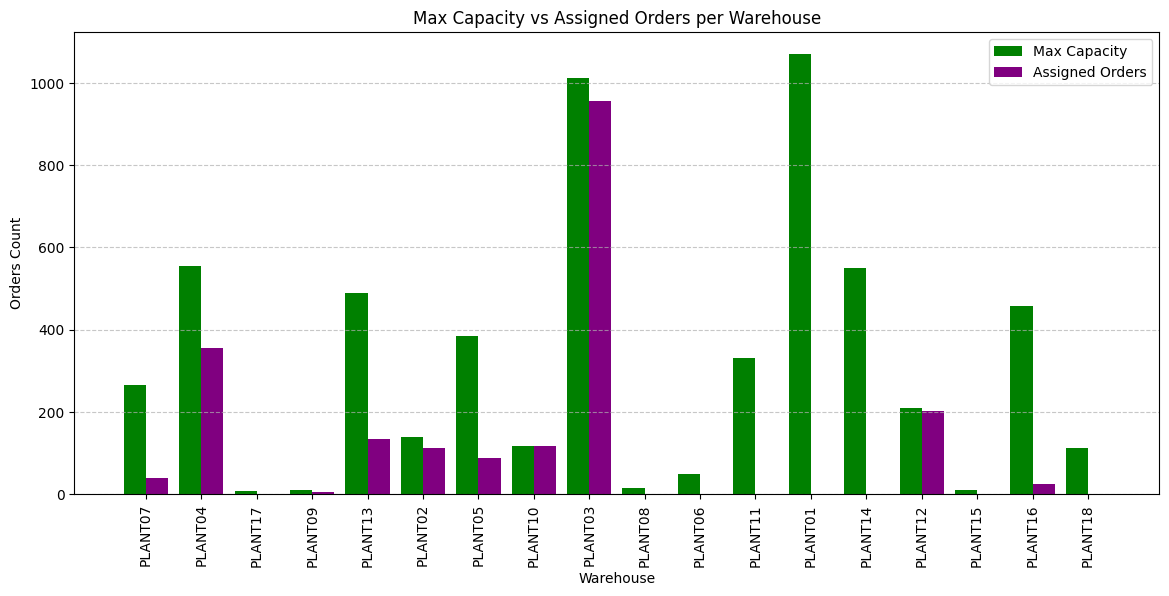

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted1[df_final_sorted1["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Max Capacity"], width=bar_width, color='green', label="Max Capacity")
plt.bar(x_indexes + bar_width/2, df_filtered["Assigned Orders"], width=bar_width, color='purple', label="Assigned Orders")

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Orders Count")
plt.title("Max Capacity vs Assigned Orders per Warehouse")
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


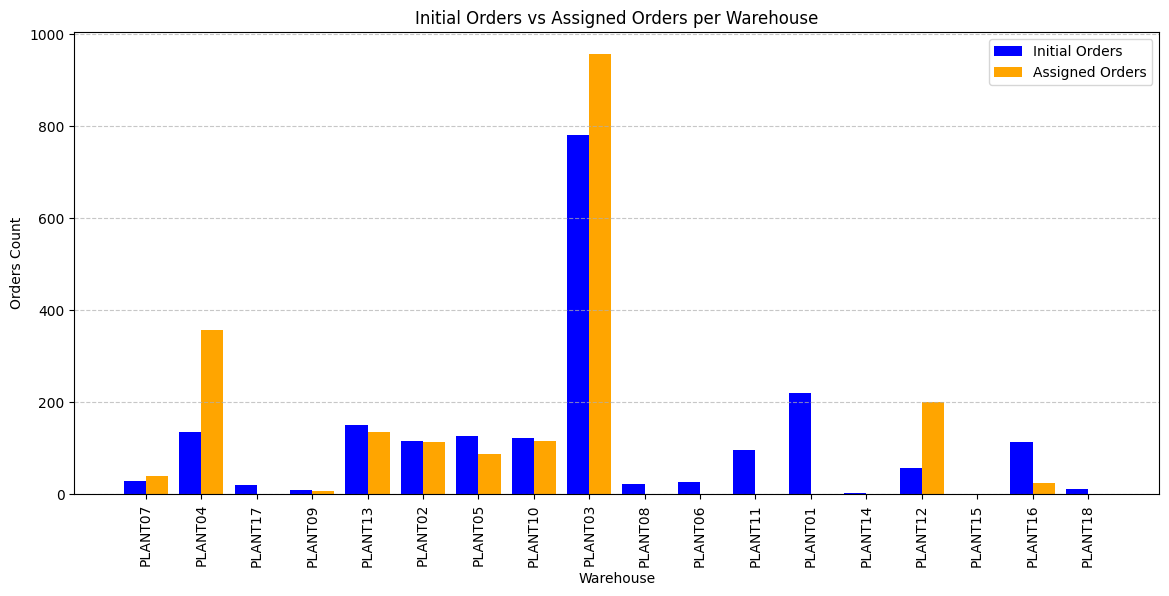

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted1[df_final_sorted1["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Initial Orders"], width=bar_width, color='blue', label="Initial Orders")
plt.bar(x_indexes + bar_width/2, df_filtered["Assigned Orders"], width=bar_width, color='orange', label="Assigned Orders")

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Orders Count")
plt.title("Initial Orders vs Assigned Orders per Warehouse")
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


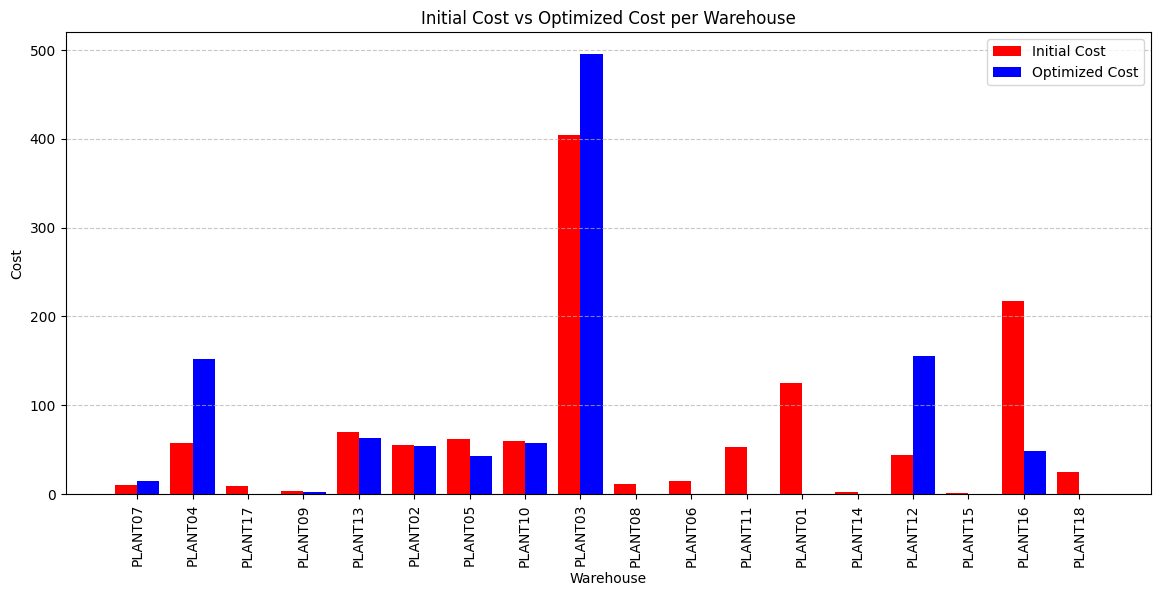

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted1[df_final_sorted1["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Initial Cost"], width=bar_width, color='red', label="Initial Cost")
plt.bar(x_indexes + bar_width/2, df_filtered["Optimized Cost"], width=bar_width, color='blue', label="Optimized Cost") # Changed "Optimised Cost" to "Optimized Cost"

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Cost")
plt.title("Initial Cost vs Optimized Cost per Warehouse") # Changed "Optimised Cost" to "Optimized Cost"
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

**Total Cost Reduction & Cost Reduction Percentage**

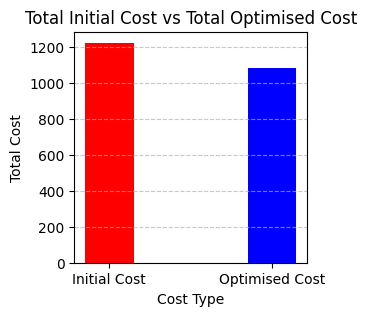

In [ ]:
import matplotlib.pyplot as plt

# Extract total values from the final sorted dataframe
total_initial_cost = df_final_sorted1[df_final_sorted1["Warehouse"] == "TOTAL"]["Initial Cost"].values[0]
total_optimized_cost = df_final_sorted1[df_final_sorted1["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]

# Define labels and values
labels = ["Initial Cost", "Optimised Cost"]
values = [total_initial_cost, total_optimized_cost]
colors = ["red", "blue"]

# Create bar chart
plt.figure(figsize=(3, 3))
plt.bar(labels, values, color=colors, width=0.3)

# Add labels and title
plt.xlabel("Cost Type")
plt.ylabel("Total Cost")
plt.title("Total Initial Cost vs Total Optimised Cost")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [ ]:
# Calculate total cost reduction and cost reduction percentage
total_initial_cost1 = df_final_sorted1[df_final_sorted1["Warehouse"] == "TOTAL"]["Initial Cost"].values[0]
total_optimized_cost1 = df_final_sorted1[df_final_sorted1["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]

total_cost_reduction1 = (total_initial_cost1 - total_optimized_cost1) # This line calculates the total cost reduction
cost_reduction_percentage1 = (total_cost_reduction1 / total_initial_cost1) * 100 if total_initial_cost > 0 else 0 # Changed to total_cost_reduction1

# Print the results
print(f"\n💰 Total Cost Reduction: {total_cost_reduction1:.2f}")
print(f"📉 Cost Reduction Percentage: {cost_reduction_percentage1:.2f}%")


💰 Total Cost Reduction: 138.83
📉 Cost Reduction Percentage: 11.34%


# **Ant Colony Optimization Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import random

# Load the Excel file
xls = pd.ExcelFile('/content/Supply chain logisitcs problem.xlsx')

# Load relevant tables
wh_capacities = pd.read_excel(xls, "WhCapacities")  # Warehouse capacities
wh_costs = pd.read_excel(xls, "WhCosts")  # Warehouse costs per unit
products_per_plant = pd.read_excel(xls, "ProductsPerPlant")  # Product-Warehouse compatibility
order_list = pd.read_excel(xls, "OrderList")  # Historical orders

# Convert warehouse capacities and costs into dictionaries
wh_capacities_dict = dict(zip(wh_capacities["Plant ID"], wh_capacities["Daily Capacity "]))
wh_costs_dict = dict(zip(wh_costs["WH"], wh_costs["Cost/unit"]))

# Process Product-Warehouse Compatibility
product_warehouse_map = {}
product_allocations_needed = {}

for _, row in products_per_plant.iterrows():
    product_id = row["Product ID"]
    plant_code = row["Plant Code"]

    if plant_code not in wh_capacities_dict:
        continue  # Skip invalid warehouses

    if product_id not in product_warehouse_map:
        product_warehouse_map[product_id] = []
    product_warehouse_map[product_id].append(plant_code)

    product_allocations_needed[product_id] = product_allocations_needed.get(product_id, 0) + 1

# Process Demand per Product
product_demand = order_list.groupby("Product ID")["Unit quantity"].sum().to_dict()

# Ant Colony Optimization Parameters
NUM_ANTS = 50  # Number of ants in the colony
NUM_ITERATIONS = 200  # Number of iterations for optimization
ALPHA = 1  # Influence of pheromone
BETA = 3  # Stronger bias toward cost minimization
EVAPORATION_RATE = 0.3  # Lower evaporation to retain good solutions longer
Q = 500  # Higher pheromone deposit factor for best solutions

# Initialize pheromone levels (higher initial value = more exploration)
tau = {wh: 1.0 for wh in wh_capacities_dict.keys()}  # Pheromone levels per warehouse

# Function to evaluate a solution
def evaluate_solution(solution):
    warehouse_usage = {wh: 0 for wh in wh_capacities_dict.keys()}
    total_cost = 0
    penalty = 1e9  # High penalty for constraint violations

    for product, warehouse in solution:
        if warehouse in wh_costs_dict and product in product_demand:
            demand = product_demand[product]
            cost = wh_costs_dict[warehouse] * demand
            total_cost += cost
            warehouse_usage[warehouse] += 1

    # Apply penalty for warehouse overuse
    for wh, usage in warehouse_usage.items():
        if usage > wh_capacities_dict[wh]:
            total_cost += penalty * (usage - wh_capacities_dict[wh])  # Penalize proportionally

    return total_cost

# Function to construct a solution with **strict least-cost prioritization**
def construct_solution():
    solution = []
    warehouse_usage = {wh: 0 for wh in wh_capacities_dict.keys()}

    for product, required_allocations in product_allocations_needed.items():
        valid_warehouses = product_warehouse_map.get(product, [])
        warehouse_options = []

        # Prioritize least-cost warehouses while respecting pheromones
        for wh in valid_warehouses:
            if wh in wh_costs_dict:
                cost = wh_costs_dict[wh]
                heuristic = 1 / (cost + 1e-6)  # **Strong bias toward lowest cost**
                warehouse_options.append((wh, cost, (tau[wh]**ALPHA) * (heuristic**BETA)))

        # Sort warehouses **strictly** by cost (Lowest first)
        warehouse_options = sorted(warehouse_options, key=lambda x: x[1])

        for _ in range(required_allocations):
            allocated = False
            for wh, cost, prob in warehouse_options:
                if warehouse_usage[wh] < wh_capacities_dict[wh]:  # Ensure capacity is not exceeded
                    solution.append((product, wh))
                    warehouse_usage[wh] += 1
                    allocated = True
                    break  # Stop once allocated successfully

            # If all preferred warehouses are full, assign to **next cheapest**
            if not allocated:
                available_warehouses = sorted(
                    [(wh, wh_costs_dict[wh]) for wh in wh_capacities_dict.keys() if warehouse_usage[wh] < wh_capacities_dict[wh]],
                    key=lambda x: x[1]  # Sort by cost again
                )

                if available_warehouses:
                    chosen_warehouse = available_warehouses[0][0]  # Assign to cheapest available warehouse
                    solution.append((product, chosen_warehouse))
                    warehouse_usage[chosen_warehouse] += 1

    return solution

# ACO Main Optimization Loop
best_solution = None
best_cost = float('inf')

for iteration in range(NUM_ITERATIONS):
    solutions = []
    costs = []

    for _ in range(NUM_ANTS):
        solution = construct_solution()
        cost = evaluate_solution(solution)
        solutions.append(solution)
        costs.append(cost)

    # Update pheromones
    for wh in tau.keys():
        tau[wh] *= (1 - EVAPORATION_RATE)  # Pheromone evaporation

    best_index = np.argmin(costs)
    if costs[best_index] < best_cost:
        best_solution = solutions[best_index]
        best_cost = costs[best_index]

    for product, warehouse in best_solution:
        tau[warehouse] += Q / best_cost  # Pheromone deposit for the best solution

    print(f"Iteration {iteration + 1}: Best Cost = {best_cost}")

# Convert best solution to DataFrame
best_solution_df = pd.DataFrame(best_solution, columns=["Product ID", "Assigned Warehouse"])

# Validate Warehouse Capacities
warehouse_usage_final = {wh: 0 for wh in wh_capacities_dict.keys()}
for product, warehouse in best_solution:
    warehouse_usage_final[warehouse] += 1

warehouse_validation_df = pd.DataFrame(warehouse_usage_final.items(), columns=["Warehouse", "Assigned Orders"])
warehouse_validation_df["Max Capacity"] = warehouse_validation_df["Warehouse"].map(wh_capacities_dict)
warehouse_validation_df["Capacity Exceeded"] = warehouse_validation_df["Assigned Orders"] > warehouse_validation_df["Max Capacity"]

print("\n✅ **Final Warehouse Capacity Validation Report:**")
print(warehouse_validation_df)

# Final Validation
if warehouse_validation_df["Capacity Exceeded"].any():
    print("\n❌ **Issue: Some warehouses exceed capacity! Debug needed.**")
else:
    print("\n🎉 **Optimization Complete! Strict least-cost allocation achieved with ACO!**")


Iteration 1: Best Cost = 17872037.94663344
Iteration 2: Best Cost = 17872037.94663344
Iteration 3: Best Cost = 17872037.94663344
Iteration 4: Best Cost = 17872037.94663344
Iteration 5: Best Cost = 17872037.94663344
Iteration 6: Best Cost = 17872037.94663344
Iteration 7: Best Cost = 17872037.94663344
Iteration 8: Best Cost = 17872037.94663344
Iteration 9: Best Cost = 17872037.94663344
Iteration 10: Best Cost = 17872037.94663344
Iteration 11: Best Cost = 17872037.94663344
Iteration 12: Best Cost = 17872037.94663344
Iteration 13: Best Cost = 17872037.94663344
Iteration 14: Best Cost = 17872037.94663344
Iteration 15: Best Cost = 17872037.94663344
Iteration 16: Best Cost = 17872037.94663344
Iteration 17: Best Cost = 17872037.94663344
Iteration 18: Best Cost = 17872037.94663344
Iteration 19: Best Cost = 17872037.94663344
Iteration 20: Best Cost = 17872037.94663344
Iteration 21: Best Cost = 17872037.94663344
Iteration 22: Best Cost = 17872037.94663344
Iteration 23: Best Cost = 17872037.946633

**Number of Unallocated Warehouses**

In [ ]:
# Count unallocated warehouses
unallocated_warehouses2 = sum(1 for wh, usage in warehouse_usage_final.items() if usage == 0)
print(f"\n📊 Number of Unallocated Warehouses: {unallocated_warehouses2}")


📊 Number of Unallocated Warehouses: 2


**Cost Analysis**

In [ ]:
# Remove existing TOTAL row before merging to avoid duplication
df_combined_sorted = df_combined_sorted[df_combined_sorted["Warehouse"] != "TOTAL"]

# Merge DBO results with the initial warehouse table
df_final = pd.merge(df_combined_sorted, warehouse_validation_df, on="Warehouse", how="left")

# Drop duplicate Max Capacity column
df_final.drop(columns=["Max Capacity_y"], inplace=True)

# Rename Max Capacity column for clarity
df_final.rename(columns={"Max Capacity_x": "Max Capacity"}, inplace=True)

# Add Optimized Cost column (Assigned Orders * Cost/unit)
df_final["Optimized Cost"] = df_final["Assigned Orders"] * df_final["Cost/unit"]

# Create a single TOTAL row with all summed values
total_row = pd.DataFrame([{
    "Warehouse": "TOTAL",
    "Max Capacity": df_final["Max Capacity"].sum(),
    "Initial Orders": df_final["Initial Orders"].sum(),
    "Cost/unit": None,
    "Initial Cost": df_final["Initial Cost"].sum(),
    "Assigned Orders": df_final["Assigned Orders"].sum(),
    "Capacity Exceeded": None,
    "Optimized Cost": df_final["Optimized Cost"].sum()
}])

# Append the new TOTAL row
df_final_sorted2 = pd.concat([df_final, total_row], ignore_index=True)

# Reorder columns for final output
df_final_sorted2 = df_final_sorted2[[
    "Warehouse", "Max Capacity", "Initial Orders", "Cost/unit", "Initial Cost",
    "Assigned Orders", "Capacity Exceeded", "Optimized Cost"
]]

# Display the final report
display(df_final_sorted2)


<ipython-input-9-37eee550e930>:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final_sorted2 = pd.concat([df_final, total_row], ignore_index=True)


,Warehouse,Max Capacity,Initial Orders,Cost/unit,Initial Cost,Assigned Orders,Capacity Exceeded,Optimized Cost
0,PLANT07,265,29,0.371424,10.771294,74,False,27.485371
1,PLANT04,554,134,0.428503,57.419442,303,False,129.836498
2,PLANT17,8,20,0.428947,8.578932,8,False,3.431573
3,PLANT09,11,8,0.465071,3.720569,11,False,5.115782
4,PLANT13,490,150,0.469707,70.456058,159,False,74.683422
5,PLANT02,138,116,0.477504,55.390408,138,False,65.895486
6,PLANT05,385,127,0.488144,61.994337,171,False,83.472690
7,PLANT10,118,121,0.493582,59.723410,118,False,58.242664
8,PLANT03,1013,781,0.517502,404.168977,655,False,338.963739
9,PLANT08,14,21,0.522857,10.980003,1,False,0.522857


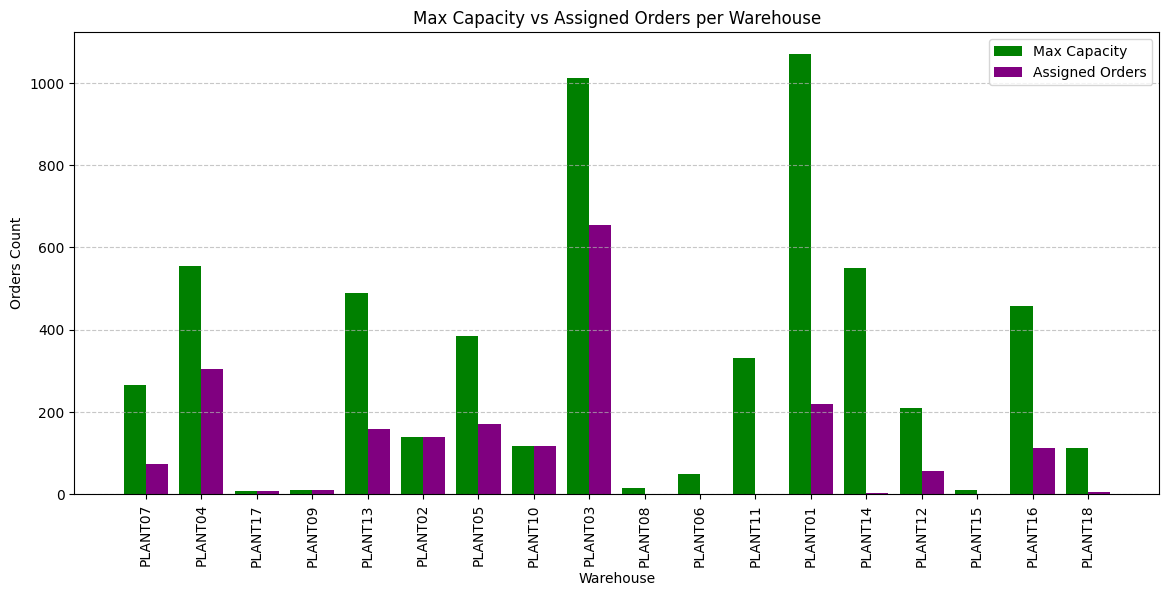

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted2[df_final_sorted2["Warehouse"] != "TOTAL"] # Changed df_final_sorted to df_final_sorted2

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Max Capacity"], width=bar_width, color='green', label="Max Capacity")
plt.bar(x_indexes + bar_width/2, df_filtered["Assigned Orders"], width=bar_width, color='purple', label="Assigned Orders")

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Orders Count")
plt.title("Max Capacity vs Assigned Orders per Warehouse")
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

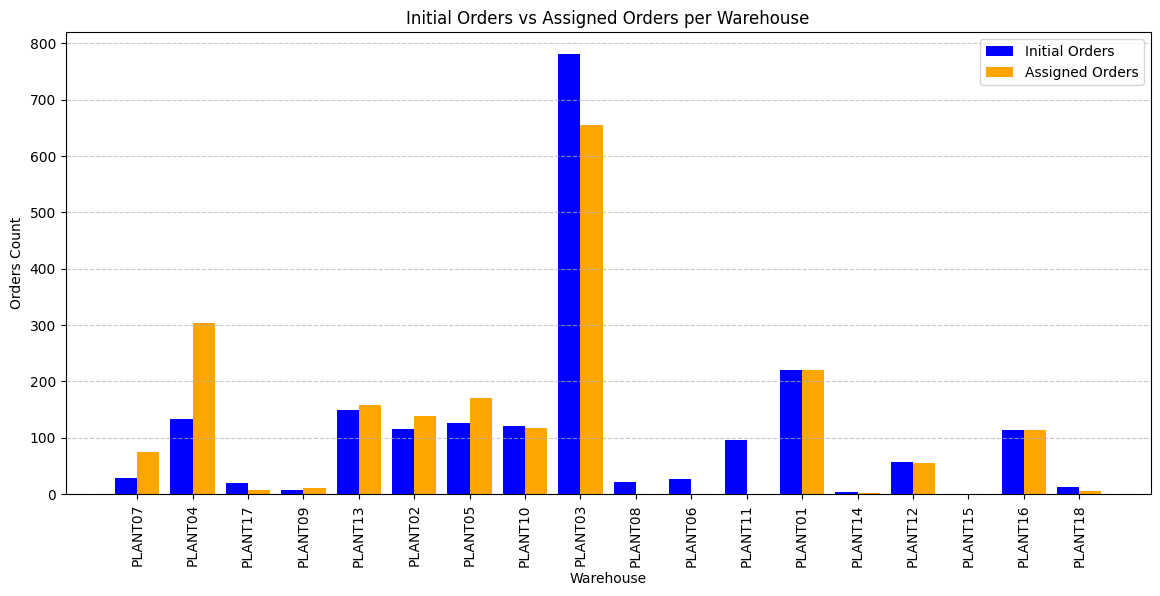

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted2[df_final_sorted2["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Initial Orders"], width=bar_width, color='blue', label="Initial Orders")
plt.bar(x_indexes + bar_width/2, df_filtered["Assigned Orders"], width=bar_width, color='orange', label="Assigned Orders")

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Orders Count")
plt.title("Initial Orders vs Assigned Orders per Warehouse")
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


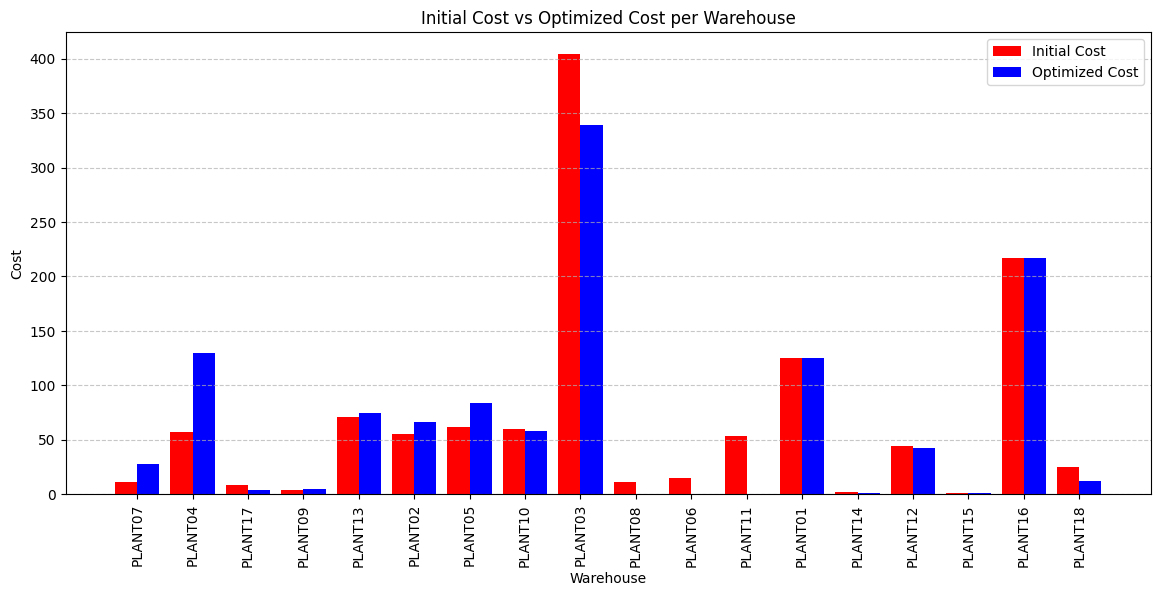

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted2[df_final_sorted2["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Initial Cost"], width=bar_width, color='red', label="Initial Cost")
plt.bar(x_indexes + bar_width/2, df_filtered["Optimized Cost"], width=bar_width, color='blue', label="Optimized Cost") # Changed "Optimised Cost" to "Optimized Cost"

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Cost")
plt.title("Initial Cost vs Optimized Cost per Warehouse") # Changed "Optimised Cost" to "Optimized Cost"
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

**Total Cost Reduction & Cost Reduction Percentage**

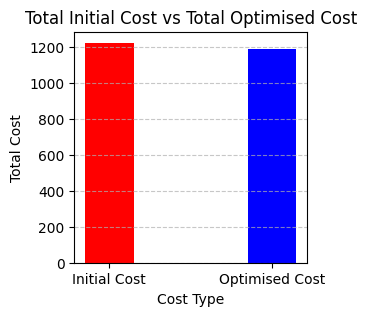

In [ ]:
import matplotlib.pyplot as plt

# Extract total values from the final sorted dataframe
total_initial_cost = df_final_sorted2[df_final_sorted2["Warehouse"] == "TOTAL"]["Initial Cost"].values[0]
total_optimized_cost = df_final_sorted2[df_final_sorted2["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]

# Define labels and values
labels = ["Initial Cost", "Optimised Cost"]
values = [total_initial_cost, total_optimized_cost]
colors = ["red", "blue"]

# Create bar chart
plt.figure(figsize=(3, 3))
plt.bar(labels, values, color=colors, width=0.3)

# Add labels and title
plt.xlabel("Cost Type")
plt.ylabel("Total Cost")
plt.title("Total Initial Cost vs Total Optimised Cost")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [ ]:
# Calculate total cost reduction and cost reduction percentage
total_initial_cost2 = df_final_sorted2[df_final_sorted2["Warehouse"] == "TOTAL"]["Initial Cost"].values[0]
total_optimized_cost2 = df_final_sorted2[df_final_sorted2["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]

total_cost_reduction2 = total_initial_cost2 - total_optimized_cost2
cost_reduction_percentage2 = (total_cost_reduction2 / total_initial_cost2) * 100 if total_initial_cost > 0 else 0 # Changed to total_cost_reduction2

# Print the results
print(f"\n💰 Total Cost Reduction: {total_cost_reduction2:.2f}")
print(f"📉 Cost Reduction Percentage: {cost_reduction_percentage2:.2f}%")


💰 Total Cost Reduction: 37.66
📉 Cost Reduction Percentage: 3.08%


# **Dung Beetle Optimization Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import heapq  # For efficient least-cost warehouse selection

# Load the Excel file
xls = pd.ExcelFile('/content/Supply chain logisitcs problem.xlsx')

# Load relevant tables
wh_capacities = pd.read_excel(xls, "WhCapacities")  # Warehouse capacities
wh_costs = pd.read_excel(xls, "WhCosts")  # Warehouse costs per unit
products_per_plant = pd.read_excel(xls, "ProductsPerPlant")  # Product-Warehouse compatibility
order_list = pd.read_excel(xls, "OrderList")  # Historical orders

# Convert warehouse capacities and costs into dictionaries
wh_capacities_dict = dict(zip(wh_capacities["Plant ID"], wh_capacities["Daily Capacity "]))
wh_costs_dict = dict(zip(wh_costs["WH"], wh_costs["Cost/unit"]))

# Process Product-Warehouse Compatibility
product_warehouse_map = {}
product_allocations_needed = {}

for _, row in products_per_plant.iterrows():
    product_id = row["Product ID"]
    plant_code = row["Plant Code"]

    if plant_code not in wh_capacities_dict:
        continue  # Skip invalid warehouses

    if product_id not in product_warehouse_map:
        product_warehouse_map[product_id] = []
    product_warehouse_map[product_id].append(plant_code)

    product_allocations_needed[product_id] = product_allocations_needed.get(product_id, 0) + 1

# Process Demand per Product
product_demand = order_list.groupby("Product ID")["Unit quantity"].sum().to_dict()

# Dung Beetle Optimization Parameters
POP_SIZE = 50  # Population size
MAX_ITER = 200  # Number of iterations
A = 1.5  # Attraction coefficient
B = 1.5  # Repulsion coefficient
C = 1.5  # Step size coefficient

# Function to evaluate a solution
def evaluate_solution(solution):
    warehouse_usage = {wh: 0 for wh in wh_capacities_dict.keys()}
    total_cost = 0
    penalty = 1e9  # High penalty for constraint violations

    for product, warehouse in solution:
        if warehouse in wh_costs_dict and product in product_demand:
            demand = product_demand[product]
            cost = wh_costs_dict[warehouse] * demand
            total_cost += cost
            warehouse_usage[warehouse] += 1

    # Apply penalty for warehouse overuse
    for wh, usage in warehouse_usage.items():
        if usage > wh_capacities_dict[wh]:
            total_cost += penalty * (usage - wh_capacities_dict[wh])  # Penalize proportionally

    return total_cost

# Function to generate a valid initial solution (ensuring cost-efficiency)
def generate_solution():
    solution = []
    warehouse_usage = {wh: 0 for wh in wh_capacities_dict.keys()}
    remaining_products = 2035  # Ensure all products are allocated
    unassigned_products = []  # Track products that couldn't be allocated

    for product, required_allocations in product_allocations_needed.items():
        valid_warehouses = [(wh_costs_dict[wh], wh) for wh in product_warehouse_map.get(product, []) if wh in wh_costs_dict]
        heapq.heapify(valid_warehouses)  # Min-heap for least-cost selection

        allocations = 0
        while valid_warehouses and allocations < required_allocations:
            _, wh = heapq.heappop(valid_warehouses)  # Get least-cost warehouse
            if warehouse_usage[wh] < wh_capacities_dict[wh]:
                solution.append((product, wh))
                warehouse_usage[wh] += 1
                allocations += 1
                remaining_products -= 1

        if allocations < required_allocations:
            unassigned_products.append((product, required_allocations - allocations))

    # Second pass: Assign unallocated products dynamically to nearest available warehouse
    for product, remaining in unassigned_products:
        valid_warehouses = sorted(wh_capacities_dict.keys(), key=lambda x: wh_costs_dict.get(x, float('inf')))  # Sort by cost

        for wh in valid_warehouses:
            if warehouse_usage[wh] < wh_capacities_dict[wh] and remaining > 0:
                solution.append((product, wh))
                warehouse_usage[wh] += 1
                remaining -= 1
                remaining_products -= 1
            if remaining == 0:
                break  # Stop if fully assigned

    assert remaining_products == 0, f"Error: {remaining_products} products are still unassigned!"
    return solution

# Initialize dung beetle population
population = [generate_solution() for _ in range(POP_SIZE)]
fitness = [evaluate_solution(ind) for ind in population]
best_solution = population[np.argmin(fitness)]
best_cost = min(fitness)

# Dung Beetle Optimization Loop
for iteration in range(MAX_ITER):
    new_population = []

    for i in range(POP_SIZE):
        leader = best_solution
        follower = population[i]

        new_solution = []
        warehouse_usage = {wh: 0 for wh in wh_capacities_dict.keys()}
        remaining_products = 2035  # Ensure all products are assigned

        for (product, warehouse) in follower:
            valid_warehouses = [(wh_costs_dict[wh], wh) for wh in product_warehouse_map.get(product, []) if warehouse_usage[wh] < wh_capacities_dict[wh]]
            heapq.heapify(valid_warehouses)  # Min-heap for cost optimization

            if valid_warehouses:
                _, new_warehouse = heapq.heappop(valid_warehouses)  # Select least-cost warehouse
            else:
                new_warehouse = warehouse

            new_solution.append((product, new_warehouse))
            warehouse_usage[new_warehouse] += 1
            remaining_products -= 1
            if remaining_products == 0:
                break

        new_population.append(new_solution)

    population = new_population
    fitness = [evaluate_solution(ind) for ind in population]

    if min(fitness) < best_cost:
        best_solution = population[np.argmin(fitness)]
        best_cost = min(fitness)

    print(f"Iteration {iteration + 1}: Best Cost = {best_cost}")

# Convert best solution to DataFrame
best_solution_df = pd.DataFrame(best_solution, columns=["Product ID", "Assigned Warehouse"])

# Validate Warehouse Capacities
warehouse_usage_final = {wh: 0 for wh in wh_capacities_dict.keys()}
for product, warehouse in best_solution:
    warehouse_usage_final[warehouse] += 1

warehouse_validation_df = pd.DataFrame(warehouse_usage_final.items(), columns=["Warehouse", "Assigned Orders"])
warehouse_validation_df["Max Capacity"] = warehouse_validation_df["Warehouse"].map(wh_capacities_dict)
warehouse_validation_df["Capacity Exceeded"] = warehouse_validation_df["Assigned Orders"] > warehouse_validation_df["Max Capacity"]

# Validate total assigned products
total_assigned = warehouse_validation_df["Assigned Orders"].sum()
assert total_assigned == 2035, f"Error: Not all products were assigned! ({total_assigned}/2035 allocated)"

print("\n✅ **Final Warehouse Capacity Validation Report:**")
print(warehouse_validation_df)
print("\n🎉 **Optimization Complete! Cost-efficient allocation achieved with DBO!**")


Iteration 1: Best Cost = 17872037.94663344
Iteration 2: Best Cost = 17872037.94663344
Iteration 3: Best Cost = 17872037.94663344
Iteration 4: Best Cost = 17872037.94663344
Iteration 5: Best Cost = 17872037.94663344
Iteration 6: Best Cost = 17872037.94663344
Iteration 7: Best Cost = 17872037.94663344
Iteration 8: Best Cost = 17872037.94663344
Iteration 9: Best Cost = 17872037.94663344
Iteration 10: Best Cost = 17872037.94663344
Iteration 11: Best Cost = 17872037.94663344
Iteration 12: Best Cost = 17872037.94663344
Iteration 13: Best Cost = 17872037.94663344
Iteration 14: Best Cost = 17872037.94663344
Iteration 15: Best Cost = 17872037.94663344
Iteration 16: Best Cost = 17872037.94663344
Iteration 17: Best Cost = 17872037.94663344
Iteration 18: Best Cost = 17872037.94663344
Iteration 19: Best Cost = 17872037.94663344
Iteration 20: Best Cost = 17872037.94663344
Iteration 21: Best Cost = 17872037.94663344
Iteration 22: Best Cost = 17872037.94663344
Iteration 23: Best Cost = 17872037.946633

**Number of Unallocated Warehouses**

In [ ]:
# Count unallocated warehouses
unallocated_warehouses3 = sum(1 for wh, usage in warehouse_usage_final.items() if usage == 0)
print(f"\n📊 Number of Unallocated Warehouses: {unallocated_warehouses3}")


📊 Number of Unallocated Warehouses: 2


**Cost Analysis**

In [ ]:
# Remove existing TOTAL row before merging to avoid duplication
df_combined_sorted = df_combined_sorted[df_combined_sorted["Warehouse"] != "TOTAL"]

# Merge DBO results with the initial warehouse table
df_final = pd.merge(df_combined_sorted, warehouse_validation_df, on="Warehouse", how="left")

# Drop duplicate Max Capacity column
df_final.drop(columns=["Max Capacity_y"], inplace=True)

# Rename Max Capacity column for clarity
df_final.rename(columns={"Max Capacity_x": "Max Capacity"}, inplace=True)

# Add Optimized Cost column (Assigned Orders * Cost/unit)
df_final["Optimized Cost"] = df_final["Assigned Orders"] * df_final["Cost/unit"]

# Create a single TOTAL row with all summed values
total_row = pd.DataFrame([{
    "Warehouse": "TOTAL",
    "Max Capacity": df_final["Max Capacity"].sum(),
    "Initial Orders": df_final["Initial Orders"].sum(),
    "Cost/unit": None,
    "Initial Cost": df_final["Initial Cost"].sum(),
    "Assigned Orders": df_final["Assigned Orders"].sum(),
    "Capacity Exceeded": None,
    "Optimized Cost": df_final["Optimized Cost"].sum()
}])

# Append the new TOTAL row
df_final_sorted3 = pd.concat([df_final, total_row], ignore_index=True)

# Reorder columns for final output
df_final_sorted3 = df_final_sorted3[[
    "Warehouse", "Max Capacity", "Initial Orders", "Cost/unit", "Initial Cost",
    "Assigned Orders", "Capacity Exceeded", "Optimized Cost"
]]

# Display the final report
display(df_final_sorted3)


<ipython-input-116-5700baffe8ff>:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final_sorted3 = pd.concat([df_final, total_row], ignore_index=True)


,Warehouse,Max Capacity,Initial Orders,Cost/unit,Initial Cost,Assigned Orders,Capacity Exceeded,Optimized Cost
0,PLANT07,265,29,0.371424,10.771294,74,False,27.485371
1,PLANT04,554,134,0.428503,57.419442,303,False,129.836498
2,PLANT17,8,20,0.428947,8.578932,8,False,3.431573
3,PLANT09,11,8,0.465071,3.720569,11,False,5.115782
4,PLANT13,490,150,0.469707,70.456058,159,False,74.683422
5,PLANT02,138,116,0.477504,55.390408,138,False,65.895486
6,PLANT05,385,127,0.488144,61.994337,171,False,83.472690
7,PLANT10,118,121,0.493582,59.723410,118,False,58.242664
8,PLANT03,1013,781,0.517502,404.168977,655,False,338.963739
9,PLANT08,14,21,0.522857,10.980003,1,False,0.522857


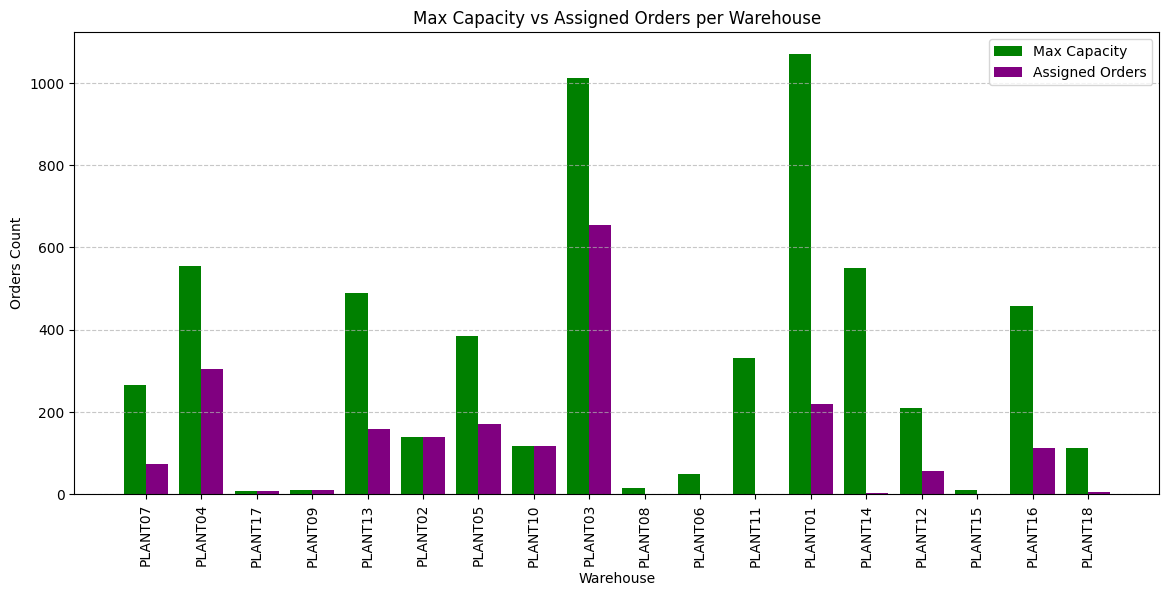

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted3[df_final_sorted3["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Max Capacity"], width=bar_width, color='green', label="Max Capacity")
plt.bar(x_indexes + bar_width/2, df_filtered["Assigned Orders"], width=bar_width, color='purple', label="Assigned Orders")

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Orders Count")
plt.title("Max Capacity vs Assigned Orders per Warehouse")
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


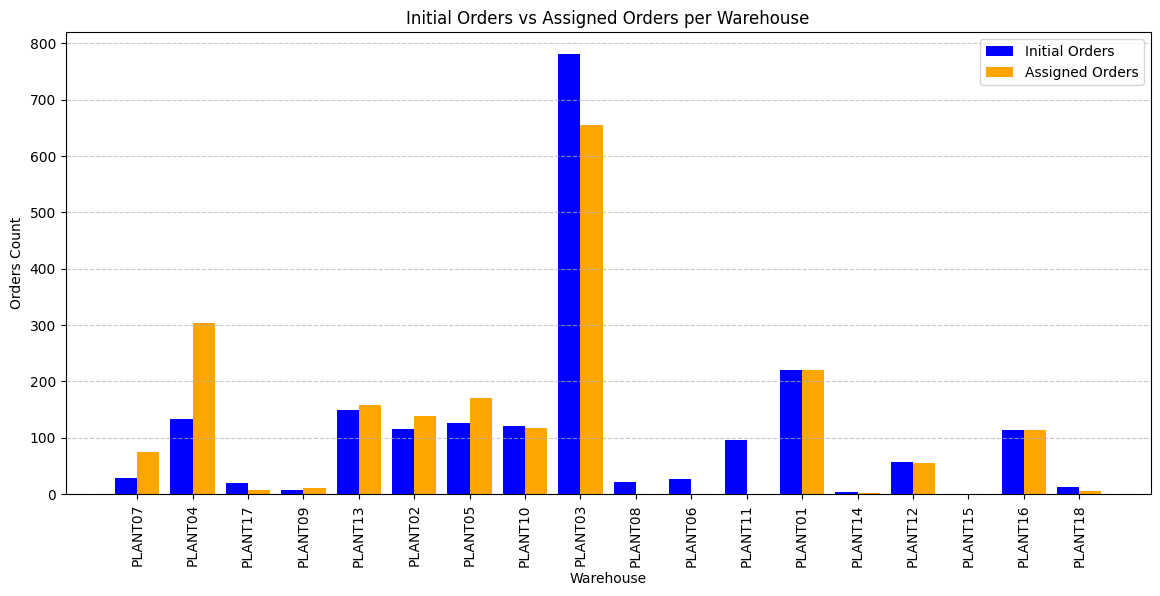

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted3[df_final_sorted3["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Initial Orders"], width=bar_width, color='blue', label="Initial Orders")
plt.bar(x_indexes + bar_width/2, df_filtered["Assigned Orders"], width=bar_width, color='orange', label="Assigned Orders")

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Orders Count")
plt.title("Initial Orders vs Assigned Orders per Warehouse")
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


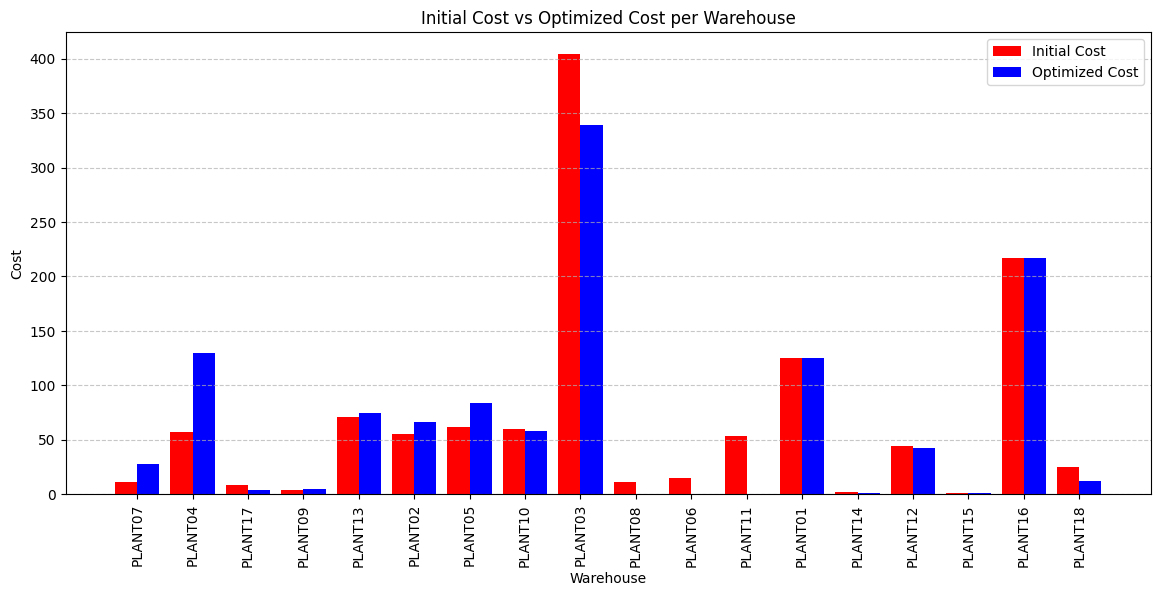

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out the TOTAL row
df_filtered = df_final_sorted3[df_final_sorted3["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.4
x_indexes = np.arange(len(df_filtered["Warehouse"]))

# Create bar chart with two bars side by side
plt.figure(figsize=(14, 6))
plt.bar(x_indexes - bar_width/2, df_filtered["Initial Cost"], width=bar_width, color='red', label="Initial Cost")
plt.bar(x_indexes + bar_width/2, df_filtered["Optimized Cost"], width=bar_width, color='blue', label="Optimized Cost") # Changed "Optimised Cost" to "Optimized Cost"

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Cost")
plt.title("Initial Cost vs Optimized Cost per Warehouse") # Changed "Optimised Cost" to "Optimized Cost"
plt.xticks(ticks=x_indexes, labels=df_filtered["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

**Total Cost Reduction & Cost Reduction Percentage**

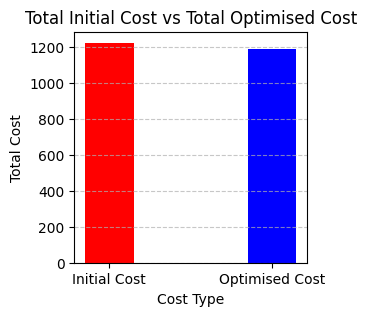

In [ ]:
import matplotlib.pyplot as plt

# Extract total values from the final sorted dataframe
total_initial_cost = df_final_sorted3[df_final_sorted3["Warehouse"] == "TOTAL"]["Initial Cost"].values[0]
total_optimized_cost = df_final_sorted3[df_final_sorted3["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]

# Define labels and values
labels = ["Initial Cost", "Optimised Cost"]
values = [total_initial_cost, total_optimized_cost]
colors = ["red", "blue"]

# Create bar chart
plt.figure(figsize=(3, 3))
plt.bar(labels, values, color=colors, width=0.3)

# Add labels and title
plt.xlabel("Cost Type")
plt.ylabel("Total Cost")
plt.title("Total Initial Cost vs Total Optimised Cost")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [ ]:
# Calculate total cost reduction and cost reduction percentage
total_initial_cost3 = df_final_sorted3[df_final_sorted3["Warehouse"] == "TOTAL"]["Initial Cost"].values[0]
total_optimized_cost3 = df_final_sorted3[df_final_sorted3["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]

total_cost_reduction3 = total_initial_cost3 - total_optimized_cost3
cost_reduction_percentage3 = (total_cost_reduction3 / total_initial_cost) * 100 if total_initial_cost > 0 else 0 # Changed to total_cost_reduction3

# Print the results
print(f"\n💰 Total Cost Reduction: {total_cost_reduction3:.2f}")
print(f"📉 Cost Reduction Percentage: {cost_reduction_percentage3:.2f}%")


💰 Total Cost Reduction: 37.66
📉 Cost Reduction Percentage: 3.08%


# **OVERALL COST ANALYSIS**

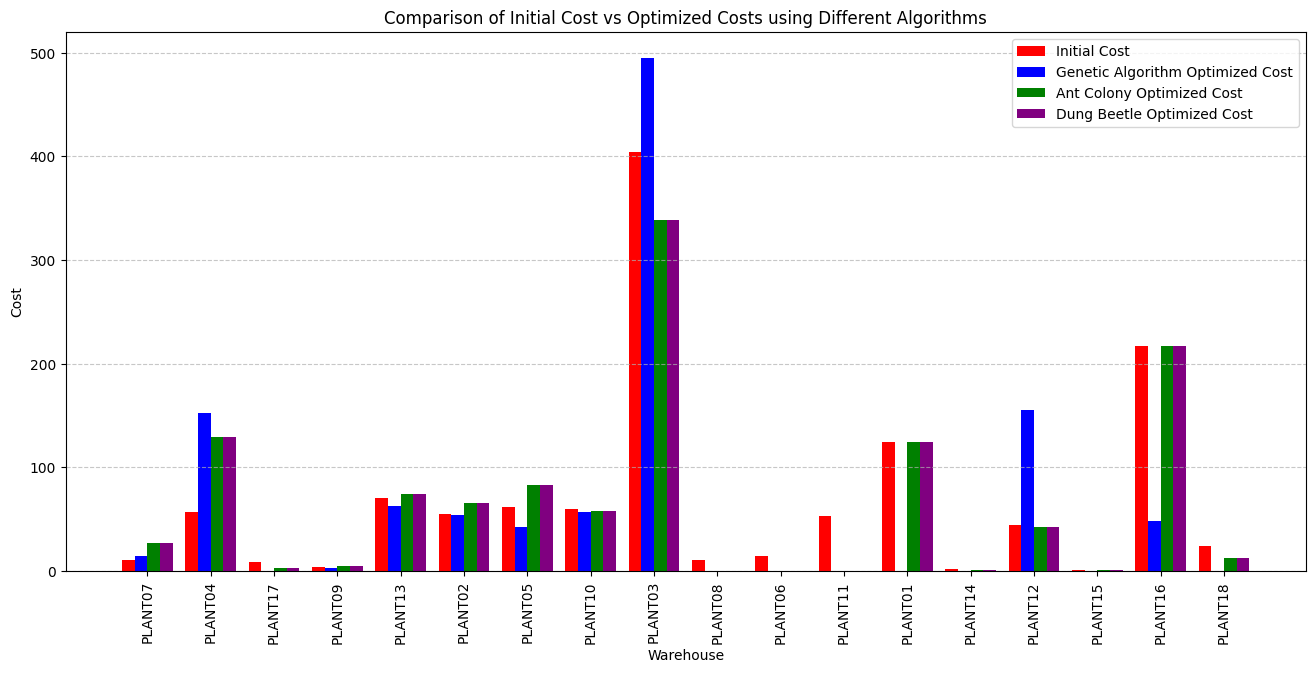

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure all dataframes exclude the "TOTAL" row
df_filtered1 = df_final_sorted1[df_final_sorted1["Warehouse"] != "TOTAL"]
df_filtered2 = df_final_sorted2[df_final_sorted2["Warehouse"] != "TOTAL"]
df_filtered3 = df_final_sorted3[df_final_sorted3["Warehouse"] != "TOTAL"]

# Set width of bars
bar_width = 0.2
x_indexes = np.arange(len(df_filtered1["Warehouse"]))

# Create the grouped bar chart
plt.figure(figsize=(16, 7))
plt.bar(x_indexes - (1.5 * bar_width), df_filtered1["Initial Cost"], width=bar_width, color='red', label="Initial Cost")
plt.bar(x_indexes - (0.5 * bar_width), df_filtered1["Optimized Cost"], width=bar_width, color='blue', label="Genetic Algorithm Optimized Cost")
plt.bar(x_indexes + (0.5 * bar_width), df_filtered2["Optimized Cost"], width=bar_width, color='green', label="Ant Colony Optimized Cost")
plt.bar(x_indexes + (1.5 * bar_width), df_filtered3["Optimized Cost"], width=bar_width, color='purple', label="Dung Beetle Optimized Cost")

# Add labels and title
plt.xlabel("Warehouse")
plt.ylabel("Cost")
plt.title("Comparison of Initial Cost vs Optimized Costs using Different Algorithms")
plt.xticks(ticks=x_indexes, labels=df_filtered1["Warehouse"], rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


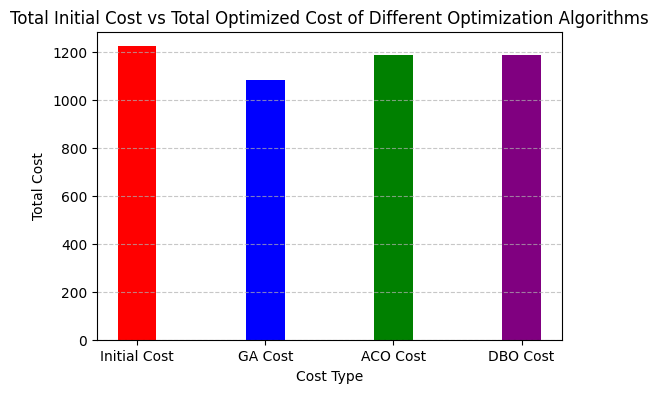

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract total cost values from the "TOTAL" row for each optimization algorithm
total_initial_cost = df_final_sorted1[df_final_sorted1["Warehouse"] == "TOTAL"]["Initial Cost"].values[0]
optimized_cost_genetic = df_final_sorted1[df_final_sorted1["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]
optimized_cost_ant_colony = df_final_sorted2[df_final_sorted2["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]
optimized_cost_dung_beetle = df_final_sorted3[df_final_sorted3["Warehouse"] == "TOTAL"]["Optimized Cost"].values[0]

# Define labels and values
labels = ["Initial Cost", "GA Cost", "ACO Cost", "DBO Cost"]
values = [total_initial_cost, optimized_cost_genetic, optimized_cost_ant_colony, optimized_cost_dung_beetle]
colors = ["red", "blue", "green", "purple"]

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=colors, width=0.3)

# Add labels and title
plt.xlabel("Cost Type")
plt.ylabel("Total Cost")
plt.title("Total Initial Cost vs Total Optimized Cost of Different Optimization Algorithms")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


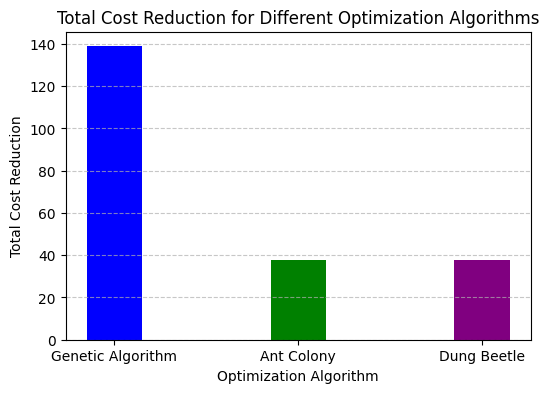

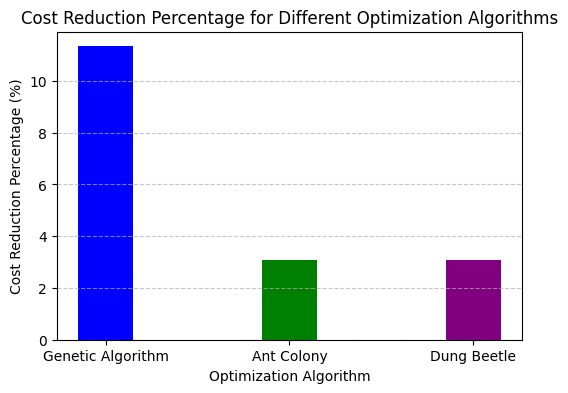

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the labels for the algorithms
labels = ["Genetic Algorithm", "Ant Colony", "Dung Beetle"]

# Define the total cost reduction values
total_cost_reduction_values = [total_cost_reduction1, total_cost_reduction2, total_cost_reduction3]

# Define the cost reduction percentage values
cost_reduction_percentage_values = [cost_reduction_percentage1, cost_reduction_percentage2, cost_reduction_percentage3]

# Set width of bars
bar_width = 0.3

# Create figure for Total Cost Reduction
plt.figure(figsize=(6, 4))
plt.bar(labels, total_cost_reduction_values, color=['blue', 'green', 'purple'], width=bar_width)

# Add labels and title
plt.xlabel("Optimization Algorithm")
plt.ylabel("Total Cost Reduction")
plt.title("Total Cost Reduction for Different Optimization Algorithms")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Create figure for Cost Reduction Percentage
plt.figure(figsize=(6, 4))
plt.bar(labels, cost_reduction_percentage_values, color=['blue', 'green', 'purple'], width=bar_width)

# Add labels and title
plt.xlabel("Optimization Algorithm")
plt.ylabel("Cost Reduction Percentage (%)")
plt.title("Cost Reduction Percentage for Different Optimization Algorithms")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()
